# Capstone Project IBM Data Science Specialization

This notebook is used to solve the final project on the IBM Data Science Specialization. It's about Seattle car accident's database. The final goal is to predict the severity of an accident on the road.

## Data Understanding

In [1]:
#Importing the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


In [2]:
# The code was removed by Watson Studio for sharing.

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [34]:
df_data_1['INATTENTIONIND'] = df_data_1['INATTENTIONIND'].fillna('N')
df_data_1['COLLISIONTYPE'] = df_data_1['COLLISIONTYPE'].fillna('N')
df_data_1['PEDROWNOTGRNT'] = df_data_1['PEDROWNOTGRNT'].fillna('N')
df_data_1['SPEEDING'] = df_data_1['SPEEDING'].fillna('N')
df_data_1['UNDERINFL'] = df_data_1['UNDERINFL'].replace(['0'],'N')
df_data_1['UNDERINFL'] = df_data_1['UNDERINFL'].replace(['1'],'Y')

In [35]:
#Selection of several variables of the dataset, the idea was reduce computational resources and better data preprocessing

df_usedpre=df_data_1[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
df_usedpre.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Injury Collision,Pedestrian,2,1,0,1,1,0,0,N,N,Clear,Dry,Daylight,Y,N,N
1,2,Intersection,Injury Collision,Angles,4,0,0,2,2,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
3,1,Intersection,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
4,0,Block,Unknown,N,0,0,0,0,0,0,0,N,NaN,NaN,NaN,NaN,N,N,N


In [17]:
df_usedpre.shape

(221266, 19)

In [18]:
df_usedpre.dtypes

SEVERITYCODE       object
ADDRTYPE           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INJURIES            int64
SERIOUSINJURIES     int64
FATALITIES          int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
HITPARKEDCAR       object
dtype: object

In [19]:
df_usedpre.SEVERITYDESC.value_counts()

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

### Data Preprocessing

In [20]:
#Dataframe to see the NaN values
missing_data = df_usedpre.isnull()
missing_data.head(5)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False


In [21]:
# checking the NaN values. The goal is to solve the missing values for the columns that looks good to predict.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print(" ")

SEVERITYCODE
False    221265
True          1
Name: SEVERITYCODE, dtype: int64
 
ADDRTYPE
False    217554
True       3712
Name: ADDRTYPE, dtype: int64
 
SEVERITYDESC
False    221266
Name: SEVERITYDESC, dtype: int64
 
COLLISIONTYPE
False    194767
True      26499
Name: COLLISIONTYPE, dtype: int64
 
PERSONCOUNT
False    221266
Name: PERSONCOUNT, dtype: int64
 
PEDCOUNT
False    221266
Name: PEDCOUNT, dtype: int64
 
PEDCYLCOUNT
False    221266
Name: PEDCYLCOUNT, dtype: int64
 
VEHCOUNT
False    221266
Name: VEHCOUNT, dtype: int64
 
INJURIES
False    221266
Name: INJURIES, dtype: int64
 
SERIOUSINJURIES
False    221266
Name: SERIOUSINJURIES, dtype: int64
 
FATALITIES
False    221266
Name: FATALITIES, dtype: int64
 
INATTENTIONIND
False    221266
Name: INATTENTIONIND, dtype: int64
 
UNDERINFL
False    194787
True      26479
Name: UNDERINFL, dtype: int64
 
WEATHER
False    194578
True      26688
Name: WEATHER, dtype: int64
 
ROADCOND
False    194658
True      26608
Name: ROADCOND, dtype: int6

In [20]:
#Filling the missing answers with a N in order to create a dummy variable
df_usedpre['INATTENTIONIND'] = df_usedpre['INATTENTIONIND'].fillna('N')
df_usedpre['PEDROWNOTGRNT'] = df_usedpre['PEDROWNOTGRNT'].fillna('N')
df_usedpre['SPEEDING'] = df_usedpre['SPEEDING'].fillna('N')

In [5]:
#Droping rows with unknown values from the dataframe
indexsever = df_usedpre[df_usedpre['SEVERITYDESC'] == 'Unknown'].index
df_usedpre.drop(indexsever, inplace=True)
df_usedpre.SEVERITYDESC.value_counts()


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Property Damage Only Collision    137485
Injury Collision                   58698
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

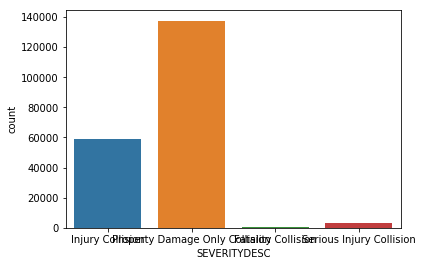

In [17]:
sns.countplot(x='SEVERITYDESC',data=df_usedpre)

#### Checking Numerical Variables

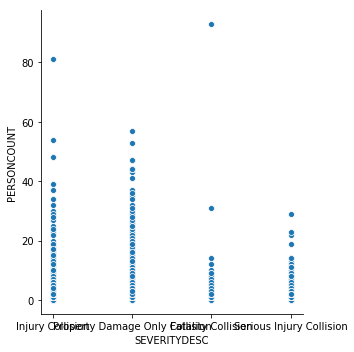

In [110]:
sns.relplot(x="SEVERITYDESC", y="PERSONCOUNT",  data=df_usedpre)

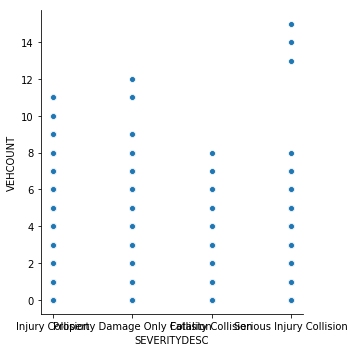

In [111]:
sns.relplot(x="SEVERITYDESC", y="VEHCOUNT",  data=df_usedpre)

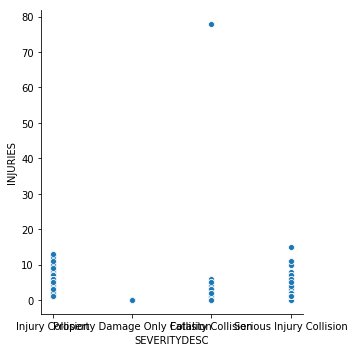

In [112]:
sns.relplot(x="SEVERITYDESC", y="INJURIES",  data=df_usedpre)

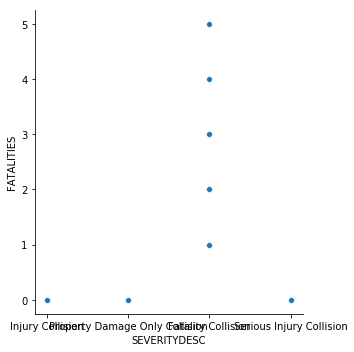

In [31]:
sns.relplot(x="SEVERITYDESC", y="FATALITIES",  data=df_usedpre)

In [113]:
#Checking variables correlation
df_usedpre.corr()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
PERSONCOUNT,1.000000,-0.019036,-0.038712,0.384149,0.279312,0.105406,0.046151
PEDCOUNT,-0.019036,1.000000,-0.019284,-0.270659,0.159474,0.130930,0.072196
PEDCYLCOUNT,-0.038712,-0.019284,1.000000,-0.258519,0.115113,0.060489,0.010353
VEHCOUNT,0.384149,-0.270659,-0.258519,1.000000,0.038395,-0.033886,-0.026232
INJURIES,0.279312,0.159474,0.115113,0.038395,1.000000,0.278154,0.066037
SERIOUSINJURIES,0.105406,0.130930,0.060489,-0.033886,0.278154,1.000000,0.172714
FATALITIES,0.046151,0.072196,0.010353,-0.026232,0.066037,0.172714,1.000000


### Checking Classification columns

#### Light Conditions

<function matplotlib.pyplot.show(*args, **kw)>

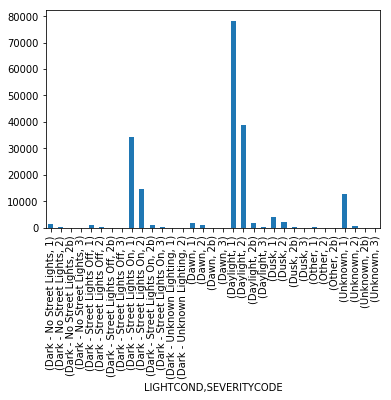

In [33]:
df_light = df_usedpre.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()
df_light.plot(kind = 'bar')
plt.show

#### Adress Type

In [49]:
df_adress = df_usedpre.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts()

<function matplotlib.pyplot.show(*args, **kw)>

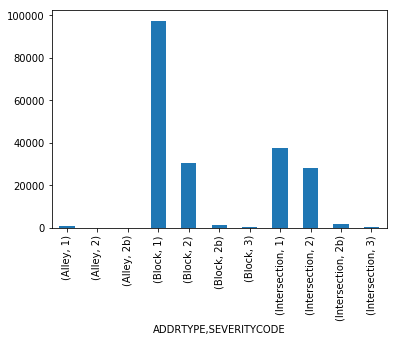

In [50]:
df_adress.plot(kind = 'bar')
plt.show

#### Collision Type

<function matplotlib.pyplot.show(*args, **kw)>

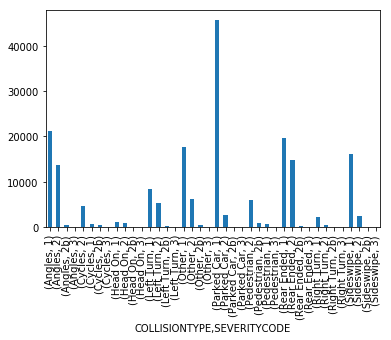

In [52]:
df_collision = df_usedpre.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()
df_collision.plot(kind = 'bar')
plt.show

#### Under Influence

<function matplotlib.pyplot.show(*args, **kw)>

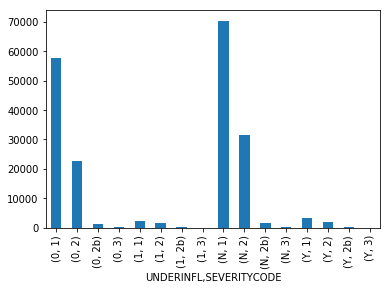

In [53]:
df_under = df_usedpre.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()
df_under.plot(kind = 'bar')
plt.show

In [ ]:
#In this case i' ll assume that 0 and 1 are equal to N and Y respectively
df_used['UNDERINFL'] = df_usedpre['UNDERINFL'].replace(['0'],'N')
df_used['UNDERINFL'] = df_usedpre['UNDERINFL'].replace(['1'],'Y')

<function matplotlib.pyplot.show(*args, **kw)>

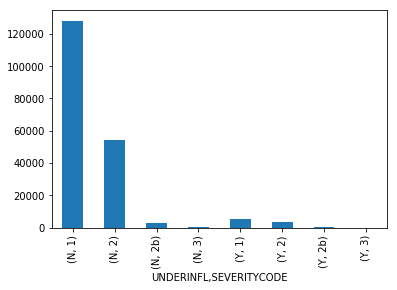

In [8]:
#Doing the group by again
df_under = df_usedpre.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()
df_under.plot(kind = 'bar')
plt.show

#### Weather

<function matplotlib.pyplot.show(*args, **kw)>

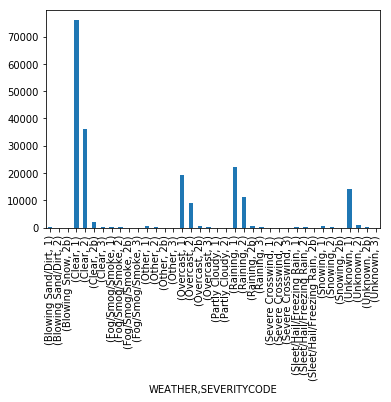

In [95]:
df_wea = df_usedpre.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()
df_wea.plot(kind = 'bar')
plt.show

#### Speeding

<function matplotlib.pyplot.show(*args, **kw)>

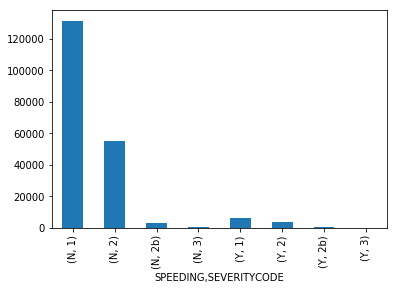

In [96]:
df_speed = df_usedpre.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

#### Road Condition

<function matplotlib.pyplot.show(*args, **kw)>

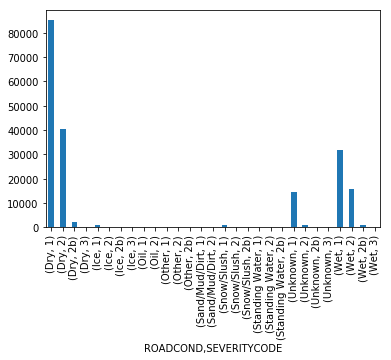

In [109]:
df_speed = df_usedpre.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

#### Inattention

<function matplotlib.pyplot.show(*args, **kw)>

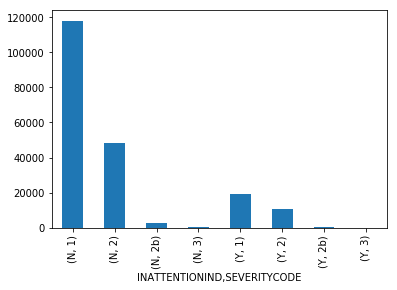

In [98]:
df_speed = df_usedpre.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

#### Pedestrian Rights

<function matplotlib.pyplot.show(*args, **kw)>

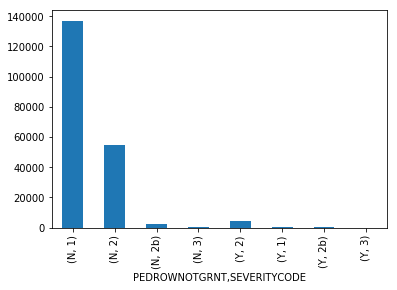

In [105]:
df_speed = df_usedpre.groupby(['PEDROWNOTGRNT'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

#### Hit Parked Car

<function matplotlib.pyplot.show(*args, **kw)>

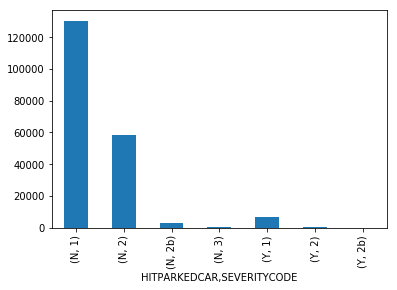

In [107]:
df_speed = df_usedpre.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

## Methodology 

With this in mind, the candidates variables are used to create the machine learning models: Decision Tree and K-Neighbors

In [18]:
#now let's try to balance the dataset, at least property damage with injury collision
from sklearn.utils import resample

predf_may=df_usedpre[df_usedpre.SEVERITYCODE=='1']
predf_min=df_usedpre[df_usedpre.SEVERITYCODE=='2']
predf_min2=df_usedpre[df_usedpre.SEVERITYCODE=='2b']
predf_min3=df_usedpre[df_usedpre.SEVERITYCODE=='3']

predf_may_down= resample(predf_may,replace=False,n_samples=58698,random_state=123)

df_used=pd.concat([predf_may_down,predf_min,predf_min2,predf_min3])

df_used.head()


,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
114648,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
26901,1,Block,Property Damage Only Collision,Rear Ended,5,0,0,4,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
201061,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,N,Y,Clear,Dry,Daylight,N,N,Y
46978,1,Intersection,Property Damage Only Collision,Other,1,0,0,1,0,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
148467,1,Block,Property Damage Only Collision,Parked Car,4,0,0,2,0,0,0,N,N,Clear,Dry,Daylight,N,N,N


In [19]:
df_used.SEVERITYDESC.value_counts()

Property Damage Only Collision    58698
Injury Collision                  58698
Serious Injury Collision           3098
Fatality Collision                  349
Name: SEVERITYDESC, dtype: int64

In [20]:
#Now I change categorical variables to numerical variables in order to use the models

df_used['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_used['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)


In [52]:
#Now is time to create the feature to use in the prediction models.
X = df_used[['PERSONCOUNT', 'VEHCOUNT','SPEEDING', 'INATTENTIONIND']]  #.astype(float)
#Using hot encoding with Collisiontype column
X = pd.concat([X,pd.get_dummies(df_used['COLLISIONTYPE'])], axis=1)
X[0:5]

,PERSONCOUNT,VEHCOUNT,SPEEDING,INATTENTIONIND,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
114648,2,2,0,0,0,0,0,0,0,1,0,0,0,0
26901,5,4,0,0,0,0,0,0,0,0,0,1,0,0
201061,2,2,0,0,0,0,0,0,0,1,0,0,0,0
46978,1,1,0,0,0,0,0,0,1,0,0,0,0,0
148467,4,2,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
#Prediction variable 
y = df_used['SEVERITYCODE'].values
y[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

In [54]:
#Standarizing the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.36106335,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [ 1.71043543,  3.10289094, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458, -0.47594242,
        -0.25324592,  2.03913186, -0.11660396, -0.29097979],
       [-0.36106335,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [-1.05156295, -1.32149932, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253,  2.7232034 , -0.47594242,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [ 1.01993583,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49

Now is time to split the dataset into train and test

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (84590, 14) (84590,)
Test set: (36253, 14) (36253,)


### K-Neigbors

The best accuracy was 0.6491600695114887 with k= 9


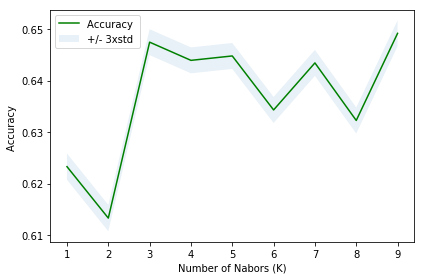

In [66]:
#loop to find the best K for the model
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [67]:
#Creating the KNN Model
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [68]:
yhatknn = neigh.predict(X_test)
yhatknn[0:5]

array(['1', '1', '2', '1', '2'], dtype=object)

In [69]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatknn))

Train set Accuracy:  0.6523938999881783
Test set Accuracy:  0.6491600695114887


### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
descTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
descTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
yhatree = descTree.predict(X_test)
yhatree

array(['2', '2', '2', ..., '2', '1', '2'], dtype=object)

In [73]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, descTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatree))

Train set Accuracy:  0.6589667809433739
Test set Accuracy:  0.6629244476319202


### Support Vector Machine

In [75]:
from sklearn import svm
three_svm = svm.SVC(kernel='rbf')
three_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
yhatsvm = three_svm.predict(X_test)
yhatsvm

array(['2', '2', '2', ..., '2', '1', '1'], dtype=object)

In [78]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, three_svm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))

Train set Accuracy:  0.6851046222957796
Test set Accuracy:  0.6869500455134747


### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
four_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [80]:
yhatlog = four_LR.predict(X_test)
yhatlog

array(['2', '2', '2', ..., '2', '1', '1'], dtype=object)

In [81]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, four_LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatlog))

Train set Accuracy:  0.6797139141742523
Test set Accuracy:  0.6815435963920228


### Results and Evaluation

In [83]:
#calculation of accuracy using the three diferent evaluation metrics knn

#jaccard
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, yhatknn))

#F1-Score
from sklearn.metrics import f1_score
f1_score(y_test, yhatknn, average='weighted') 

0.6491600695114887


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6386305613079174

In [84]:
#calculation of accuracy using the three diferent evaluation metrics des tree

#jaccard

print(jaccard_similarity_score(y_test,yhatree  ))

#F1-Score

f1_score(y_test, yhatree , average='weighted') 


0.6629244476319202


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6367621672716367

In [88]:
#calculation of accuracy using the three diferent evaluation metrics svm


#jaccard
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,yhatsvm  ))

#F1-Score
from sklearn.metrics import f1_score
f1_score(y_test,yhatsvm , average='weighted') 



0.6869500455134747


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6749756655967597

In [90]:
#calculation of accuracy using the three diferent evaluation metrics logloss

#Predictions
pred_prob = four_LR.predict_proba(X_test)

#jaccard
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,yhatlog ))

#F1-Score
from sklearn.metrics import f1_score
print(f1_score(y_test,yhatlog, average='weighted'))

#log_loss
from sklearn.metrics import log_loss
print(log_loss(y_test,pred_prob))


0.6815435963920228
0.6698540413817416
0.6572526178687504


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Results Resume

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0,72    | 0,70     | NA      |
| Decision Tree      | 0,78    | 0,73     | NA      |
| SVM                | 0,72    | 0,62     | NA      |
| LogisticRegression | 0,74    | 0,63     | 0,56    |